In [21]:
import os
import zipfile
import glob
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, image_dataset_from_directory
from shutil import copyfile
import matplotlib.pyplot as plt

# Download the Dataset

Download the dataset from its original source by running the cell below.
Note that the zip file that contains the images is unzipped under the /tmp directory.

if on Linux or colab:

``!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"``

`!wget --no-check-certificate "https://download.microsoftcom/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919Fkagglecatsanddogs_5340.zip" -O "/tmp/cats-and-dogs.zip"`

In [11]:
local_zip = 'A:\huan_shit\coursera\Tf_Certificate\CNN\Week_1\kagglecatsanddogs_5340.zip'
zip_ref  = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [14]:
os.listdir("./")

['img.png',
 'CNN.ipynb',
 'C2W1_Assignment.ipynb',
 'kagglecatsanddogs_5340.zip',
 'kagglecatsanddogs_5340',
 'PetImages',
 'readme[1].txt',
 'CDLA-Permissive-2.0.pdf']

In [13]:
os.listdir("./kagglecatsanddogs_5340")

['PetImages', 'readme[1].txt', 'CDLA-Permissive-2.0.pdf']

Now the images in stores  ./kagglecatsanddogs_5340/PetImages \
There is a subdirectory for each class, so one for dogs and one for cats.

In [16]:
source_path = "./kagglecatsanddogs_5340/PetImages"
source_path_dogs = os.path.join(source_path, "Dog")
source_path_cats = os.path.join(source_path, "Cat")

In [27]:
!find A:\huan_shit\coursera\Tf_Certificate\CNN\Week_1\kagglecatsanddogs_5340 -type f ! -name "*.jpg" -exec rm {} +

Access denied - A:\HUAN_SHIT\COURSERA\TF_CERTIFICATE\CNN\WEEK_1\KAGGLECATSANDDOGS_5340
File not found - -TYPE
File not found - F
File not found - !
File not found - -NAME
File not found - -EXEC
File not found - RM
File not found - {}
File not found - +


In [25]:
len(os.listdir(source_path_dogs)), len(os.listdir(source_path_cats))

(12501, 12501)

In [56]:
int(len(glob.glob(os.path.join(source_path_dogs, "*.jpg"))) *0.9)

11250

In [52]:
dog_list = glob.glob(os.path.join(source_path_dogs, "*.jpg"))
os.path.getsize(dog_list[0])

34448

In [58]:
for i in dog_list:
  if os.path.getsize(i) == 0:
    print(os.path.basename(i))

11702.jpg


#### Deletes all non-image files
(there are two .db files bundled into the dataset)
Cmd on window is hard to me, so 2 will using glob, to find *jpg images, instead of removing .db file


In [78]:
# Define root directory
root_dir = './tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Create folder for training and validation
it should look like

<img src="img.png" width=480 height=240>

In [79]:
# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """
  training = "training"
  validation = "validation"
  cats = "cats"
  dogs ="dogs"
  training_dir = os.path.join(root_path, training)
  validation_dir = os.path.join(root_path, validation)
  cats_val_dir = os.path.join(validation_dir, cats)
  dogs_val_dir = os.path.join(validation_dir, dogs)
  cats_train_dir = os.path.join(training_dir, cats)
  dogs_train_dir = os.path.join(training_dir, dogs)
  all_dir = [root_path, training_dir, validation_dir, cats_val_dir, dogs_val_dir, cats_train_dir, dogs_train_dir]
  for sub_dir in all_dir:
    if os.path.exists(sub_dir):
        shutil.rmtree(sub_dir)
    os.makedirs(sub_dir)
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [88]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./tmp/cats-v-dogs\training
./tmp/cats-v-dogs\validation
./tmp/cats-v-dogs\training\cats
./tmp/cats-v-dogs\training\dogs
./tmp/cats-v-dogs\validation\cats
./tmp/cats-v-dogs\validation\dogs


In [87]:
for i in os.scandir(rootdir):
  print(i)

## Move file from source to folder

In [105]:
def split_data(SOURCE_DIR, TRAINING_DIR,VALIDATION_DIR, SPLIT_SIZE):
  image_path = glob.glob(os.path.join(SOURCE_DIR, "*jpg"))
  image_path = random.sample(image_path, len(image_path))
  total_image = len(image_path)
  number_training_images = int(SPLIT_SIZE * total_image)
  for idx, im_path in enumerate(image_path):
    im_name = os.path.basename(im_path)
    if os.path.getsize(im_path) == 0:
      print(f"{im_name} is zero length, so ignoring")
      continue
    if idx <= number_training_images:
      destination = os.path.join(TRAINING_DIR,im_name )
      copyfile(im_path, destination)
    else:
      destination = os.path.join(VALIDATION_DIR,im_name )
      copyfile(im_path, destination)


In [106]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = r"./PetImages/Cat"
DOG_SOURCE_DIR = "./PetImages/Dog"

TRAINING_DIR = "./tmp/cats-v-dogs/training"
VALIDATION_DIR = "./tmp/cats-v-dogs/validation"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


Original cat's directory has 12501 images
Original dog's directory has 12501 images

There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1249 images of cats for validation
There are 1249 images of dogs for validation


Now that you have successfully organized the data in a way that can be easily fed to Keras’ ImageDataGenerator, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the train_val_generators function below.
Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the flow_from_directory method allows you to standarize this by defining a tuple called target_size that will be used to convert each image to this target resolution. For this exercise, use a target_size of (150, 150).
Hint:
Don’t use data augmentation by setting extra parameters when you instantiate the ImageDataGenerator class. This will make the training of your model to take longer to reach the necessary accuracy threshold to pass this assignment and this topic will be covered in the next week.

In [113]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = None



  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=None,
                                                      batch_size=None,
                                                      class_mode=None,
                                                      target_size=(None, None))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = None

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=None,
                                                                batch_size=None,
                                                                class_mode=None,
                                                                target_size=(None, None))
  ### END CODE HERE
  return train_generator, validation_generator
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1./255)




  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [114]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22500 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [137]:
# GRADED FUNCTION: create_model
from keras.layers import Conv2D, Dense
# from keras.optimizers import Adam
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE
  input_shape = (150, 150)
  model = tf.keras.models.Sequential([
    Conv2D(kernel_size=3, filters=8, activation="relu", input_shape=(150, 150, 3)),
    Conv2D(kernel_size=3, filters=16, activation="relu"),
    Conv2D(kernel_size=3, filters=32, activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(1, activation="softmax")
    ])


  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [138]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
262/704 [==========>...................] - ETA: 2:01 - loss: 0.7047 - accuracy: 0.4945

C:\Users\HOME\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


704/704 [==============================] - 227s 322ms/step - loss: 0.6117 - accuracy: 0.5000 - val_loss: 0.5210 - val_accuracy: 0.5000
Epoch 2/15
704/704 [==============================] - 209s 297ms/step - loss: 0.4080 - accuracy: 0.5000 - val_loss: 0.5162 - val_accuracy: 0.5000
Epoch 3/15
704/704 [==============================] - 209s 297ms/step - loss: 0.2015 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/15
704/704 [==============================] - 209s 296ms/step - loss: 0.0650 - accuracy: 0.5000 - val_loss: 0.8603 - val_accuracy: 0.5000
Epoch 5/15
704/704 [==============================] - 206s 292ms/step - loss: 0.0285 - accuracy: 0.5000 - val_loss: 1.2426 - val_accuracy: 0.5000
Epoch 6/15
704/704 [==============================] - 207s 294ms/step - loss: 0.0286 - accuracy: 0.5000 - val_loss: 1.3841 - val_accuracy: 0.5000
Epoch 7/15
704/704 [==============================] - 206s 292ms/step - loss: 0.0191 - accuracy: 0.5000 - val_loss: 1.2211 - val_accura

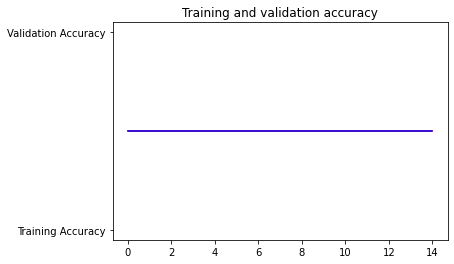

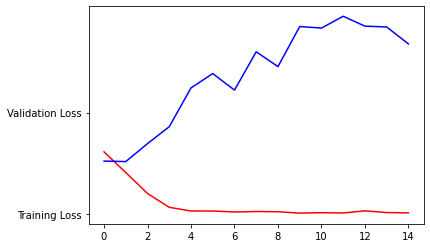

In [139]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [140]:
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)